# TPOT
TPOT is built on the scikit learn library and follows the scikit learn API closely. It can be used for regression and classification tasks and has special implementations for medical research.
TPOT is open source, well documented, and under active development. It’s development was spearheaded by researchers at the University of Pennsylvania. TPOT appears to be one of the most popular autoML libraries, with nearly 4,500 GitHub stars as of August 2018.


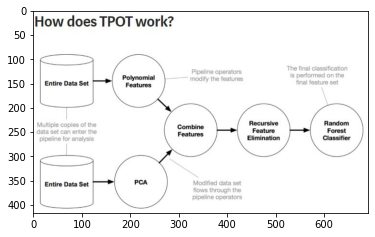

In [2]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('Capture.JPG') 
  
# Output Images 
plt.imshow(img) 

AutoML algorithms aren’t as simple as fitting one model on the dataset; they are considering multiple machine learning algorithms (random forests, linear models, SVMs, etc.) in a pipeline with multiple preprocessing steps (missing value imputation, scaling, PCA, feature selection, etc.), the hyperparameters for all of the models and preprocessing steps, as well as multiple ways to ensemble or stack the algorithms within the pipeline

## Load Libraries

In [1]:
!pip install tpot

     |████████████████████████████████| 92kB 2.5MB/s 
     |████████████████████████████████| 163kB 8.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=f7b2faa521bd208cfb7c79abafb1c20948f531aa24e5ccdcef8bdc9adf7a6d92
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


![alt text](https://raw.githubusercontent.com/EpistasisLab/tpot/master/images/tpot-ml-pipeline.png)

**Import TPOT Libraries and load  dataset**

In [0]:
from tpot import  TPOTClassifier
from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('Patient_data.csv')

In [6]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])

Rows     :  310
Columns  :  7


## Data Preparation

In [29]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

data['class']= label_encoder.fit_transform(data['class']) 
  
data['class'].unique() 

array([0, 1])

In [30]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [31]:
data['class'].unique()

array([0, 1])

In [16]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

## Train-Test Split

In [0]:
X = data.drop("class", axis=1)
y = data['class']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [34]:
X_train

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
36,32.090987,6.989378,35.998198,25.101609,132.264735,6.413428
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504
79,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401
253,63.792425,21.345323,66.000000,42.447102,119.550391,12.382604
103,49.782121,6.466805,53.000000,43.315316,110.864783,25.335647
...,...,...,...,...,...,...
128,90.513961,28.272501,69.813942,62.241459,100.892160,58.823648
129,77.236898,16.737622,49.775534,60.499275,110.690377,39.787154
196,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454
171,78.401254,14.042260,79.694263,64.358994,104.731234,12.392853


## TPOT Model building

**Use TPOT classifier to find the best model algorithm that fits the data. TPOT uses genetic algorithm based search internally**


In [38]:
tpot =  TPOTClassifier(generations=10, population_size=10, verbosity=3)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

32 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 feature_names mismatch: ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5']
expected pelvic_radius, lumbar_lordosis_angle, sacral_slope, pelvic_tilt numeric, pelvic_incidence, degree_spondylolisthesis in input data
training data did not have the following fields: f5, f1, f3, f2, f4, f0.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:
-1	0.8535615171137835	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomFor

**we built 10 different model with 10 population size out of which we will select the best model**

## Checking scores after cross validation

In [40]:
import multiprocessing

if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot =  TPOTClassifier(generations=10, population_size=20, verbosity=2,n_jobs = 20, random_state=123)
    tpot.fit(X_train, y_train)



Generation 1 - Current best internal CV score: 0.8448658649398706
Generation 2 - Current best internal CV score: 0.8448658649398706
Generation 3 - Current best internal CV score: 0.8488436632747456
Generation 4 - Current best internal CV score: 0.8488436632747456
Generation 5 - Current best internal CV score: 0.8488436632747456
Generation 6 - Current best internal CV score: 0.8534690101757633
Generation 7 - Current best internal CV score: 0.8577243293246994
Generation 8 - Current best internal CV score: 0.8577243293246994
Generation 9 - Current best internal CV score: 0.8619796484736355
Generation 10 - Current best internal CV score: 0.8619796484736355
Best pipeline: LogisticRegression(MaxAbsScaler(input_matrix), C=10.0, dual=False, penalty=l2)


In [41]:
print(tpot.score(X_test, y_test))

0.8461538461538461


**Export the scikit learn code for best classifier and dispay the code**

In [0]:
tpot.export('tpot_churn_pipeline.py')

In [43]:
!cat tpot_churn_pipeline.py

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=50)

# Average CV score on the training set was: 0.8619796484736355
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    LogisticRegression(C=10.0, dual=False, penalty="l2")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 50)

exported_pipeline.fit(training_features, training_tar

**Get details on algorithm TPOT searched for and how the performed on the dataset**



In [44]:
tpot.evaluated_individuals_

{'BernoulliNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=11, GradientBoostingClassifier__min_samples_split=19, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.45), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)': {'crossover_count': 0,
  'generation': 0,
  'internal_cv_score': 0.7461609620721553,
  'mutation_count': 0,
  'operator_count': 2,
  'predecessor': ('ROOT',)},
 'BernoulliNB(RobustScaler(input_matrix), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=False)': {'crossover_count': 0,
  'generation': 8,
  'internal_cv_score': 0.7502312673450507,
  'mutation_count': 4,
  'operator_count': 2,
  'predecessor': ('LogisticRegression(RobustScaler(input_matrix), LogisticRegression__C=0.5, LogisticRegression__dual=False, LogisticRegression__penalty=l2)',)},
 'BernoulliNB(

In [45]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('logisticregression',
                 LogisticRegression(C=10.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=50,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)